# Exercise 1: Implementing K-means Clustering

In this exercise, you'll implement the core components of the k-means clustering algorithm. Most of the setup code is provided - you just need to implement the key calculations for cluster assignment and centroid updates.

## Setup
First, let's import our required libraries and create some sample data:



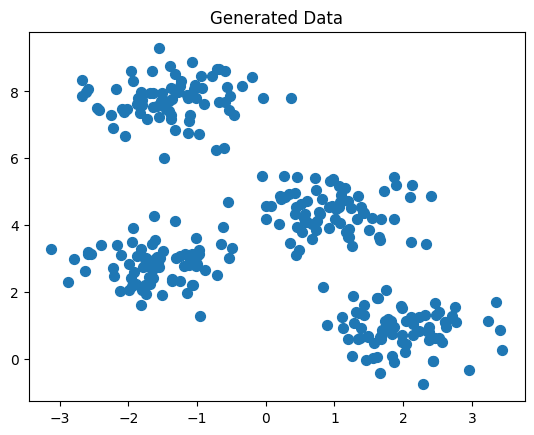

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()



## Task 1: Initialize Centroids
The initialization code is provided. This randomly selects k points as initial centroids:



In [3]:
def initialize_centroids(X, k):
    n_samples = X.shape[0]
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = X[random_indices]
    return centroids

# Initialize with k=4 clusters
k = 4
centroids = initialize_centroids(X, k)



## Task 2: Implement Cluster Assignment
Fill in the missing code in the `assign_clusters` function. This function should:
1. Calculate the distance between each point and each centroid
2. Assign each point to the nearest centroid



In [4]:
def assign_clusters(X, centroids):
    # Calculate distances between each point and each centroid
    # Hint: Use broadcasting and np.sum with axis=1
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    
    # Find the closest centroid for each point
    # Hint: Use np.argmin with axis=1
    labels = np.argmin(distances, axis=1)
    
    return labels



## Task 3: Implement Centroid Updates
Fill in the missing code in the `update_centroids` function. This function should:
1. Calculate the mean position of all points assigned to each cluster
2. Return these means as the new centroids



In [5]:
def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        # Calculate mean position of points in cluster i
        # Hint: Use boolean indexing with labels == i
        centroids[i] = X[labels == i].mean(axis=0)
    return centroids



## Task 4: Run K-means
The main k-means loop is provided. This will use your functions to run the algorithm:



In [6]:
def kmeans(X, k, max_iters=100):
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        # Assign clusters
        old_labels = assign_clusters(X, centroids)
        
        # Update centroids
        centroids = update_centroids(X, old_labels, k)
        
        # Check for convergence
        new_labels = assign_clusters(X, centroids)
        if np.all(old_labels == new_labels):
            break
            
    return centroids, new_labels

# Run kmeans
final_centroids, labels = kmeans(X, k)



## Task 5: Visualize Results
Use this code to visualize your clustering results:



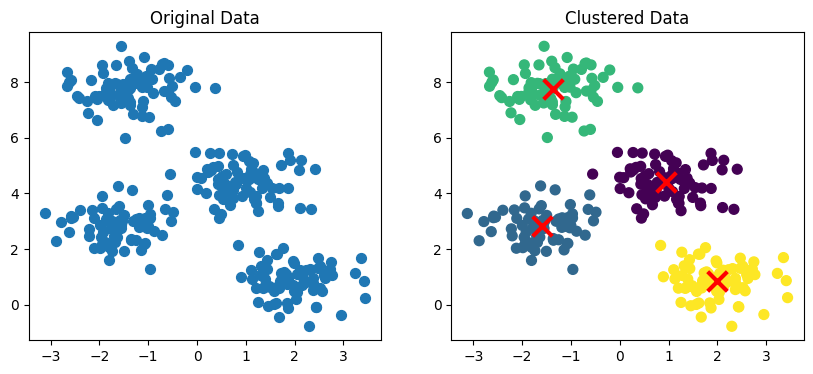

In [7]:
plt.figure(figsize=(10, 4))

# Plot original data
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original Data")

# Plot clustered data
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], 
            c='red', marker='x', s=200, linewidths=3)
plt.title("Clustered Data")
plt.show()



## Discussion Questions
1. How well did your implementation work? Are the clusters what you expected?
2. What happens if you change the number of clusters (k)?
3. Try changing the cluster_std parameter in make_blobs. How does this affect the clustering?


# Exercise 2: Finding the Optimal Number of Clusters

In this exercise, you'll implement and compare different methods for finding the optimal number of clusters: the elbow method and silhouette analysis. You'll work with a dataset where the true number of clusters isn't immediately obvious.

## Setup
First, let's import our libraries and create some sample data:



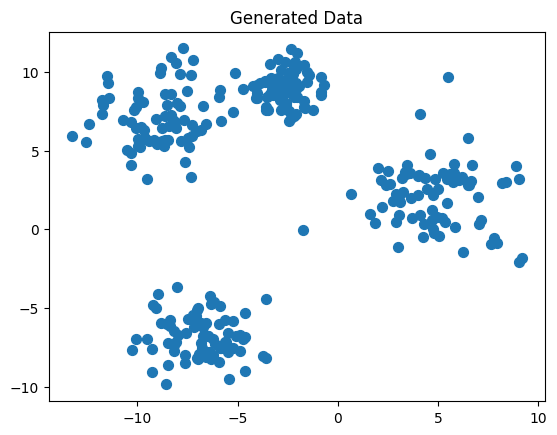

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Generate sample data with overlapping clusters
np.random.seed(42)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=[1.0, 2.0, 1.5, 1.8], random_state=42)

# Add some random noise to make it more challenging
X += np.random.normal(0, 0.1, X.shape)

plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data")
plt.show()



## Task 1: Implement the Elbow Method
Complete the function to calculate inertia (within-cluster sum of squares) for different values of k:



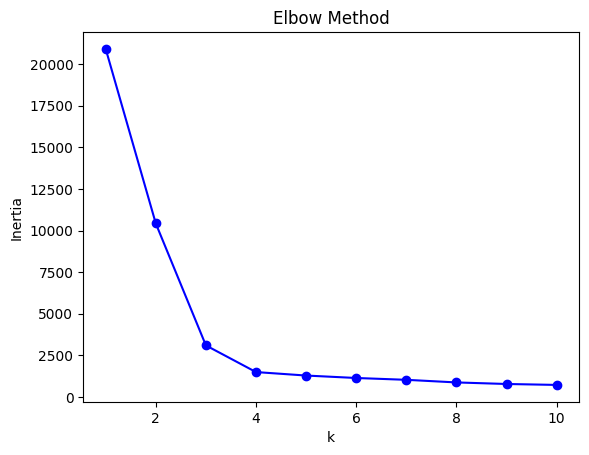

In [9]:
def calculate_inertia(X, k_range):
    inertias = []
    
    for k in k_range:
        # Create and fit KMeans model
        # Hint: Use sklearn.cluster.KMeans
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        
        # Get the inertia value
        # Hint: Access the inertia_ attribute
        inertia = kmeans.inertia_
        
        inertias.append(inertia)
    
    return inertias

# Calculate inertia for k=1 to 10
k_range = range(1, 11)
inertias = calculate_inertia(X, k_range)

# Plotting code is provided
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



## Task 2: Implement Silhouette Analysis
Complete the function to calculate silhouette scores for different values of k:



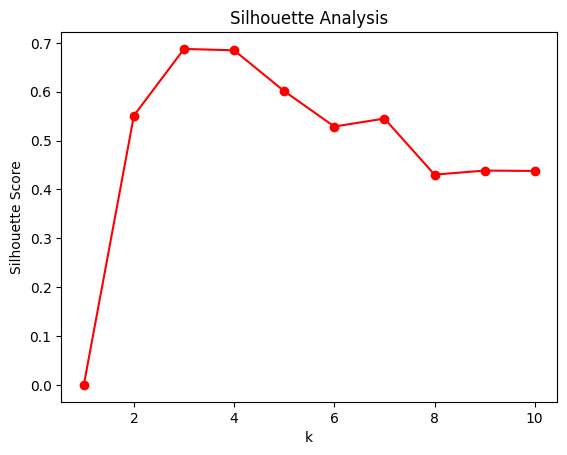

In [10]:
def calculate_silhouette(X, k_range):
    silhouette_scores = []
    
    for k in k_range:
        if k <= 1:  # Skip k=1 as silhouette score isn't defined for 1 cluster
            silhouette_scores.append(0)
            continue
            
        # Create and fit KMeans model
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        
        # Calculate silhouette score
        # Hint: Use sklearn.metrics.silhouette_score
        score = silhouette_score(X, labels)
        
        silhouette_scores.append(score)
    
    return silhouette_scores

# Calculate silhouette scores for k=1 to 10
silhouette_scores = calculate_silhouette(X, k_range)

# Plotting code is provided
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()



## Task 3: Visualize Clusters with Different k
Use this code to visualize clustering results with different k values:



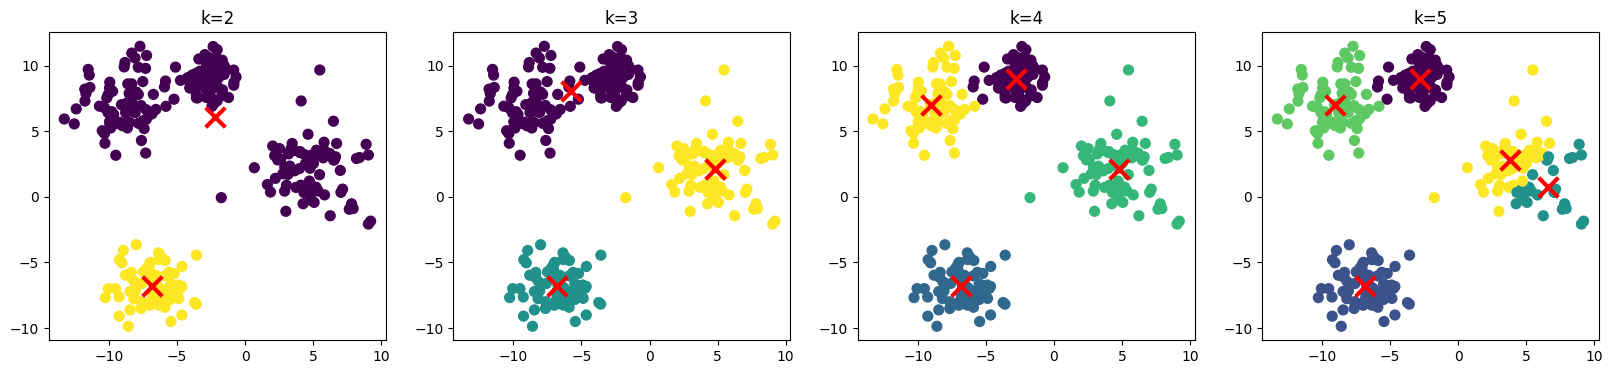

In [11]:
def plot_clusters(X, k_values):
    fig, axes = plt.subplots(1, len(k_values), figsize=(5*len(k_values), 4))
    
    for ax, k in zip(axes, k_values):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                  c='red', marker='x', s=200, linewidths=3)
        ax.set_title(f'k={k}')

# Try with different k values
plot_clusters(X, [2, 3, 4, 5])
plt.show()



## Task 4: Compare Methods
Complete this function to suggest the optimal k value based on both methods:



In [12]:
def suggest_k(inertias, silhouette_scores, k_range):
    # Calculate the elbow point
    # Hint: Look for the point of maximum curvature in inertias
    # One simple way: Find where the rate of decrease slows down significantly
    inertia_differences = np.diff(inertias)
    elbow_k = np.argmax(inertia_differences[:-1] > inertia_differences[1:]) + 1
    #elbow_k = np.argmin(abs(np.diff(inertia_differences)))+2
    
    # Find k with highest silhouette score
    # Hint: Use np.argmax
    silhouette_k = np.argmax(silhouette_scores)
    #silhouette_k = k_range(np.argmax(silhouette_scores))
    
    return elbow_k, silhouette_k

elbow_k, silhouette_k = suggest_k(inertias, silhouette_scores, k_range)
print(f"Elbow method suggests k={elbow_k}")
print(f"Silhouette analysis suggests k={silhouette_k}")

Elbow method suggests k=6
Silhouette analysis suggests k=2




## Discussion Questions
1. Do the elbow method and silhouette analysis suggest the same number of clusters? Why might they differ?
2. Looking at the visualizations, which k value do you think is most appropriate? Why?
3. How does the cluster_std parameter in make_blobs affect the optimal k value?
4. What are some limitations of these methods for determining the optimal k?

# Exercise 3: Analyzing Cluster Stability

In this exercise, you'll implement a stability analysis for k-means clustering using the Adjusted Rand Index (ARI) to compare adjacent values of k. This will help you identify regions where the clustering solution is stable.

## Setup
First, let's import our required libraries and create two different datasets - one with clear clusters and one with ambiguous clusters:



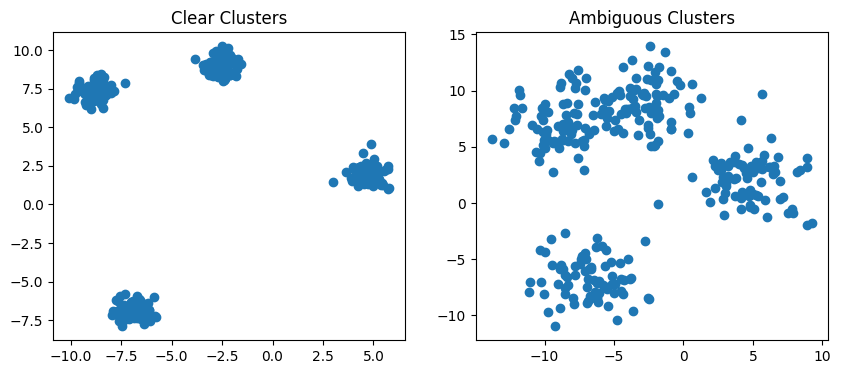

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Generate two datasets
def create_datasets():
    # Clear clusters
    X_clear, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)
    
    # Ambiguous clusters
    X_ambig, _ = make_blobs(n_samples=300, centers=4, cluster_std=2.0, random_state=42)
    
    return X_clear, X_ambig

X_clear, X_ambig = create_datasets()

# Visualize the datasets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(X_clear[:, 0], X_clear[:, 1])
ax1.set_title("Clear Clusters")
ax2.scatter(X_ambig[:, 0], X_ambig[:, 1])
ax2.set_title("Ambiguous Clusters")
plt.show()



## Task 1: Implement Adjacent Cluster Stability Analysis
Complete the function to analyze stability between adjacent k values:



In [14]:
def analyze_clustering_stability(X, k_range):
    """
    Analyze clustering stability by comparing adjacent k values.
    Returns ARI scores between consecutive values of k.
    """
    stability_scores = []
    prev_labels = None
    
    for k in k_range:
        # Create and fit KMeans
        # Hint: Use a fixed random_state for reproducibility
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = kmeans.labels_
        
        if prev_labels is not None:
            # Calculate ARI between current and previous clustering
            # Hint: Use adjusted_rand_score
            ari = adjusted_rand_score(prev_labels, labels)
            stability_scores.append(ari)
            
        prev_labels = labels
    
    return stability_scores

# Test the function on both datasets
k_range = range(1, 10)
stability_clear = analyze_clustering_stability(X_clear, k_range)
stability_ambig = analyze_clustering_stability(X_ambig, k_range)

stability_clear
stability_ambig

[0.0,
 0.5252791120347274,
 0.707831513619687,
 0.8764898936585381,
 0.9028011841901522,
 0.8044125341281714,
 0.6718786102559786,
 0.8480153588114525]



## Task 2: Visualize Stability Results
Complete the function to create a comparative visualization:



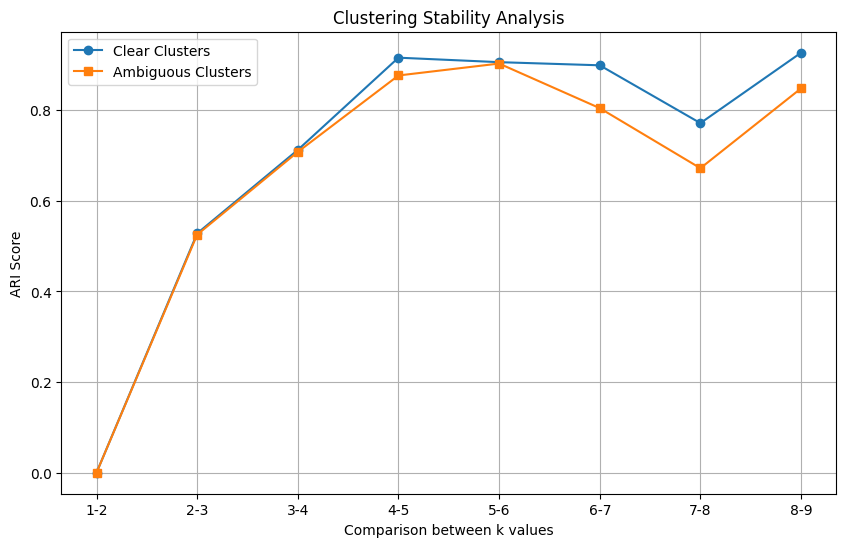

In [15]:
def plot_stability_comparison(k_range, stability_clear, stability_ambig):
    plt.figure(figsize=(10, 6))
    
    # Create x-axis labels for plotting
    # We have one fewer stability score than k values
    x_labels = [f"{k-1}-{k}" for k in list(k_range)[1:]]
    
    # Plot stability scores
    # Hint: Use plt.plot with appropriate labels and markers
    plt.plot(range(len(stability_clear)), stability_clear, label='Clear Clusters', marker='o')  # Clear clusters
    plt.plot(range(len(stability_ambig)), stability_ambig, label='Ambiguous Clusters', marker='s')  # Ambiguous clusters
    
    plt.xlabel('Comparison between k values')
    plt.ylabel('ARI Score')
    plt.title('Clustering Stability Analysis')
    plt.xticks(range(len(x_labels)), x_labels)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_stability_comparison(k_range, stability_clear, stability_ambig)



## Task 3: Identify Stability Plateau
Implement a function to automatically identify the stability plateau:



In [16]:
def find_stability_plateau(stability_scores, threshold=0.9):
    """
    Find the point where stability scores reach a plateau.
    Returns the k value at the start of the plateau.
    """
    # Calculate differences between consecutive stability scores
    score_differences = np.diff(stability_scores)
    
    # Find where differences become small
    # Hint: Look for where consecutive differences stay below a small value
    plateau_start = np.where(score_differences < threshold)[0][0]
    
    # The plateau_start index corresponds to the k value minus 2
    # (because we started at k=2 and have one fewer stability score)
    k_plateau = plateau_start + 3
    
    return k_plateau

# Find plateaus for both datasets
k_plateau_clear = find_stability_plateau(stability_clear)
k_plateau_ambig = find_stability_plateau(stability_ambig)

print(f"Stability plateau for clear clusters starts at k={k_plateau_clear}")
print(f"Stability plateau for ambiguous clusters starts at k={k_plateau_ambig}")

Stability plateau for clear clusters starts at k=3
Stability plateau for ambiguous clusters starts at k=3




## Task 4: Visualize Clustering Results
Create a function to visualize the clustering results at different k values:



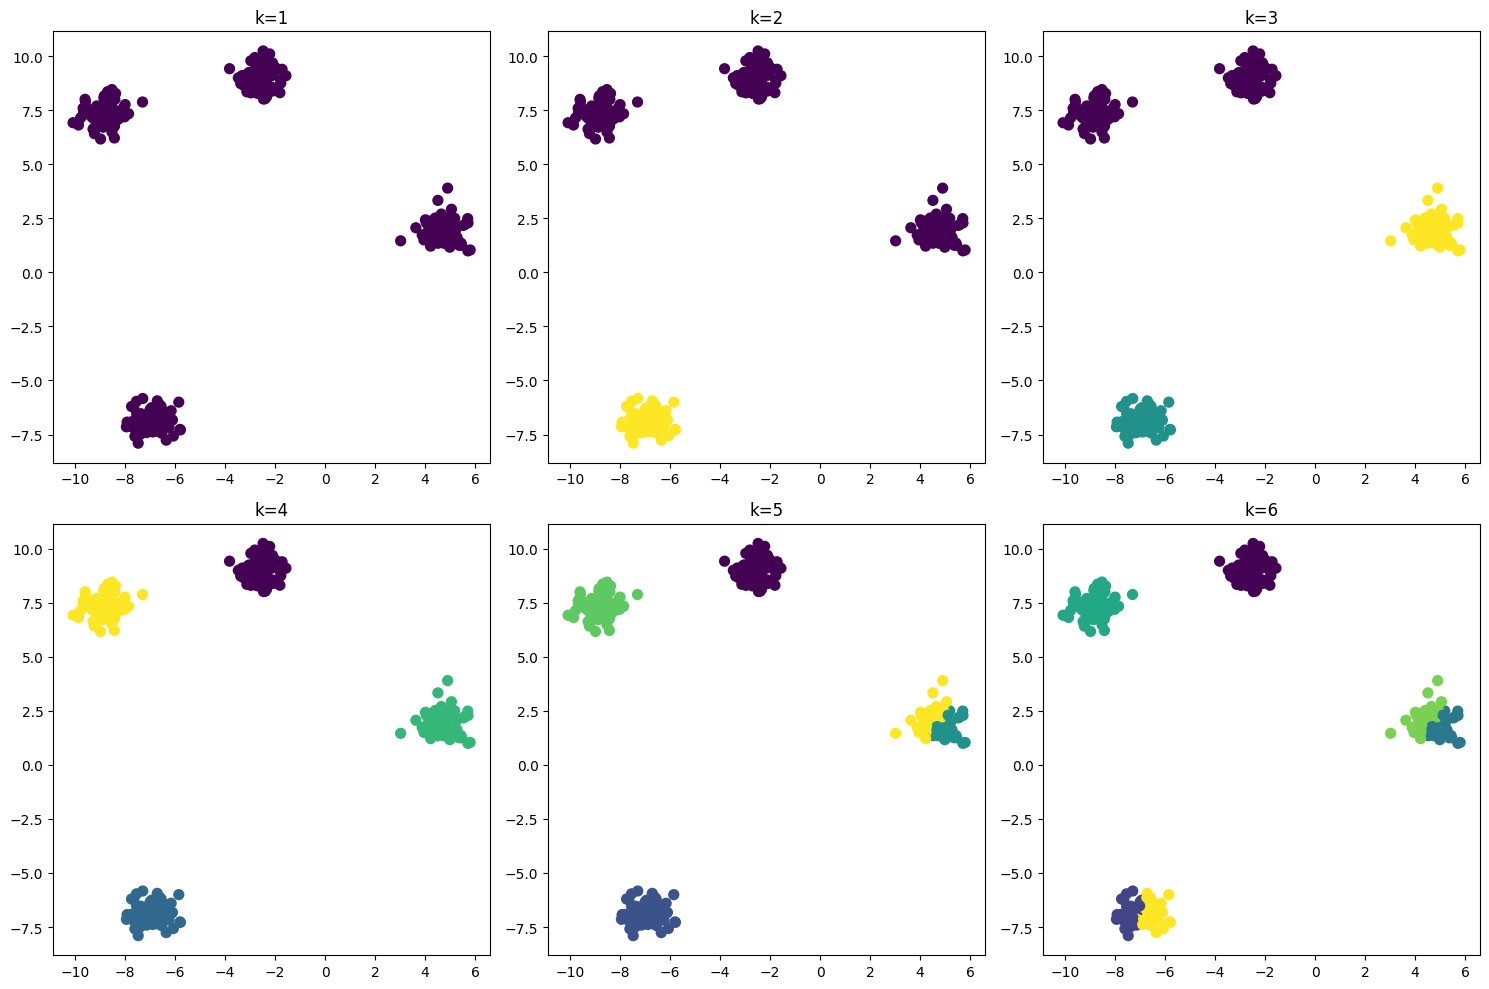

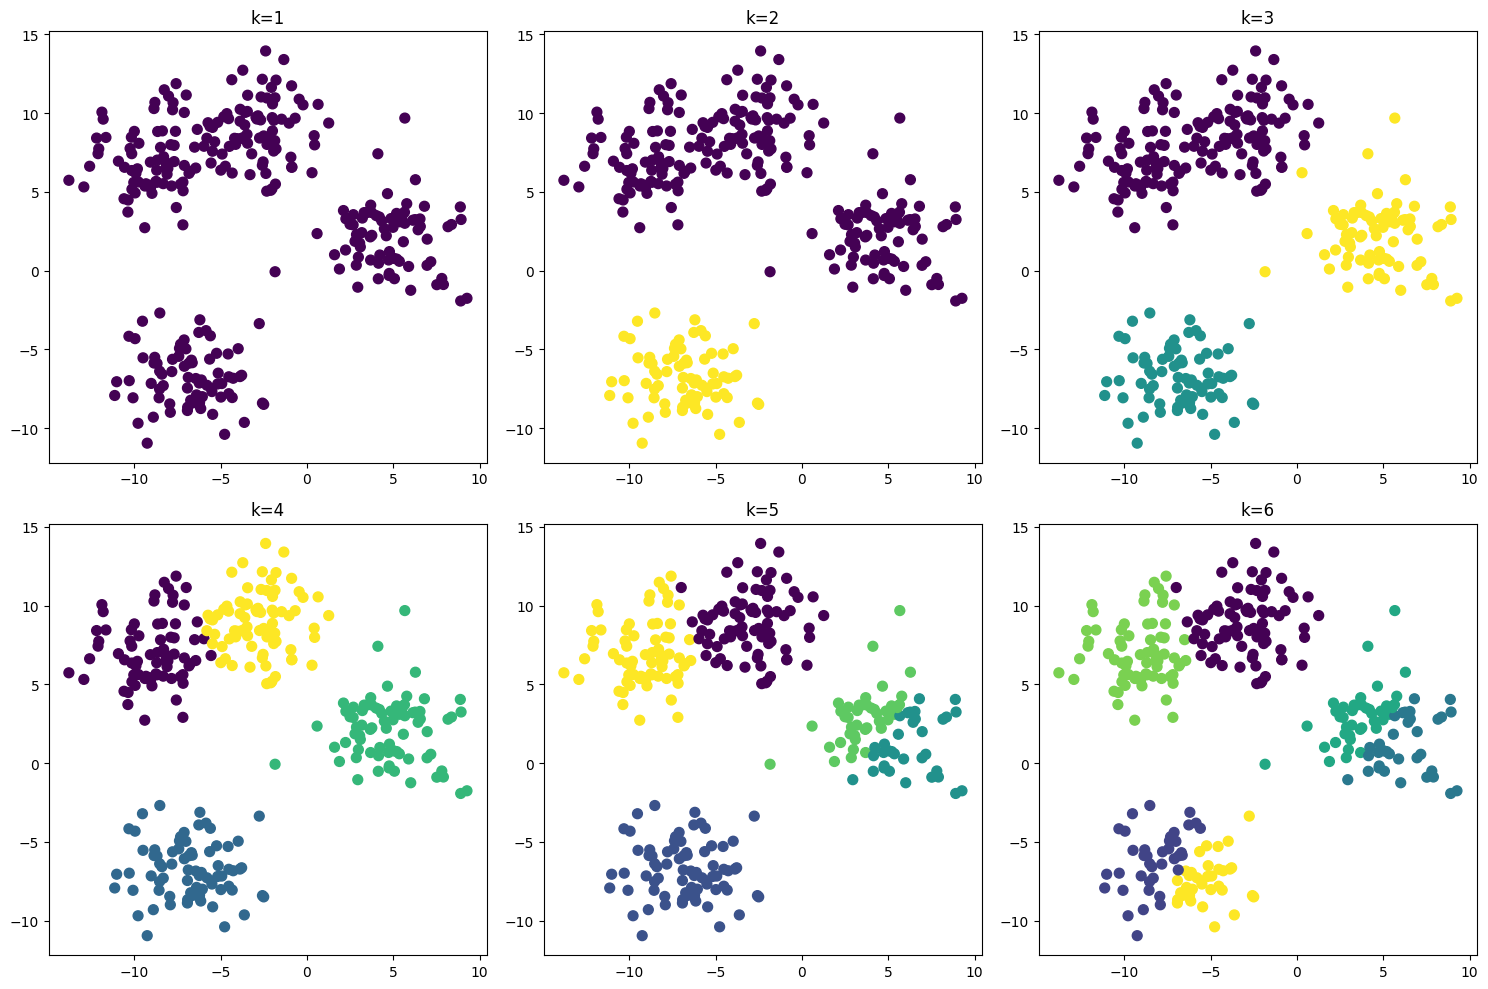

In [17]:
def plot_clustering_progression(X, k_range):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()
    
    for idx, k in enumerate(k_range[:6]):  # Plot first 6 k values
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        
        # Create scatter plot
        # Hint: Use different colors for different clusters
        axes[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
        axes[idx].set_title(f'k={k}')
    
    plt.tight_layout()
    plt.show()

# Visualize clustering progression for both datasets
plot_clustering_progression(X_clear, k_range)
plot_clustering_progression(X_ambig, k_range)



## Task 5: Create Stability Summary
Implement a function to provide a comprehensive stability analysis:



In [18]:
def analyze_stability_summary(X, k_range):
    # Calculate stability scores
    stability_scores = analyze_clustering_stability(X, k_range)
    
    # Find plateau
    k_plateau = find_stability_plateau(stability_scores)
    
    # Calculate additional metrics at plateau k
    kmeans = KMeans(n_clusters=k_plateau, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Create summary dictionary
    summary = {
        'stability_scores': stability_scores,
        'k_plateau': k_plateau,
        'inertia': kmeans.inertia_,
        'cluster_sizes': np.bincount(labels)  # Count points in each cluster
    }
    
    return summary

# Create summaries for both datasets
summary_clear = analyze_stability_summary(X_clear, k_range)
summary_ambig = analyze_stability_summary(X_ambig, k_range)

# Print summaries
for name, summary in [('Clear clusters', summary_clear), 
                     ('Ambiguous clusters', summary_ambig)]:
    print(f"\n{name}:")
    print(f"Stability plateau at k={summary['k_plateau']}")
    print(f"Cluster sizes: {summary['cluster_sizes']}")


Clear clusters:
Stability plateau at k=3
Cluster sizes: [150  75  75]

Ambiguous clusters:
Stability plateau at k=3
Cluster sizes: [149  75  76]




## Discussion Questions
1. How does the stability progression differ between the clear and ambiguous datasets?
2. Why might we prefer stability analysis over the elbow method or silhouette analysis?
3. What are the limitations of using stability between adjacent k values as a metric?
4. How could we make the plateau detection more robust?


# Exercise 4: Customer Segmentation with Real Data

In this exercise, you'll work with a real customer dataset to perform market segmentation. You'll need to handle data preprocessing, feature selection, and scaling before applying k-means clustering.

## Setup
First, let's load and examine our customer data:



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the customer data
data = pd.DataFrame({
    'age': np.random.normal(45, 15, 1000),  # Age
    'income': np.random.normal(70000, 30000, 1000),  # Annual income
    'spending_score': np.random.normal(50, 25, 1000),  # Spending score (1-100)
    'purchase_frequency': np.random.normal(10, 5, 1000),  # Purchases per month
    'last_purchase': np.random.normal(30, 20, 1000),  # Days since last purchase
})

# Add some correlations to make it more realistic
data['spending_score'] += data['income'] * 0.0001
data['purchase_frequency'] += data['spending_score'] * 0.1

print("Sample of the customer data:")
print(data.head())
print("\nData summary:")
print(data.describe())

Sample of the customer data:
         age         income  spending_score  purchase_frequency  last_purchase
0  52.450712  111980.663098       44.318609            4.892823      12.730128
1  42.926035   97739.010487       56.160934           11.314168      29.375930
2  54.715328   71788.911098       37.368393           11.668812      30.360337
3  67.845448   50591.896669       47.360151           24.174453      39.452607
4  41.487699   90946.699408       11.754303           13.958196       2.662833

Data summary:
               age         income  spending_score  purchase_frequency  \
count  1000.000000    1000.000000     1000.000000         1000.000000   
mean     45.289981   72125.087117       57.358364           15.642240   
std      14.688239   29923.631317       24.734496            5.733236   
min      -3.619010  -18211.659040      -17.866188           -3.615600   
25%      35.286145   51812.749329       41.302596           11.835843   
50%      45.379509   71892.313970       57.2



## Task 1: Data Preprocessing
Complete the function to preprocess the data for clustering:



In [20]:
def preprocess_data(data):
    # Check for missing values
    print("Missing values:\n", data.isnull().sum())
    
    # Remove outliers using IQR method
    # Hint: Use quantile to find Q1 and Q3
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Create mask for rows to keep
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)  # Filter out rows outside 1.5*IQR
    
    data_cleaned = data[mask].copy()
    
    # Scale the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data_cleaned)
    
    return scaled_features, data_cleaned, scaler

# Preprocess the data
scaled_features, data_cleaned, scaler = preprocess_data(data)

Missing values:
 age                   0
income                0
spending_score        0
purchase_frequency    0
last_purchase         0
dtype: int64




## Task 2: Feature Analysis
Implement a function to analyze feature relationships:



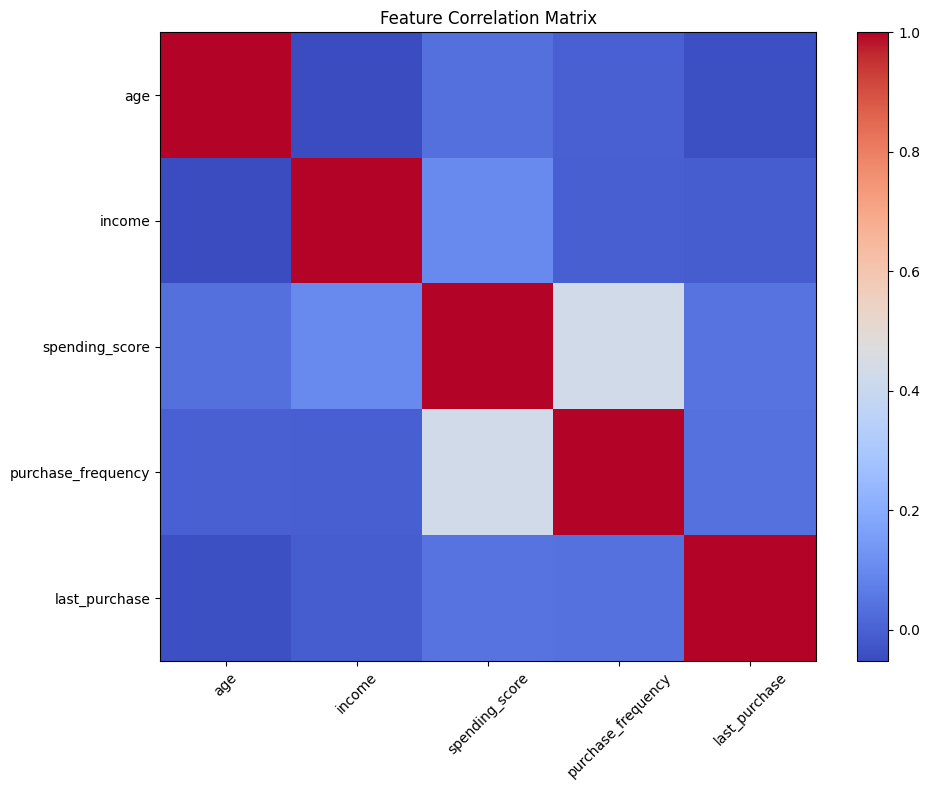

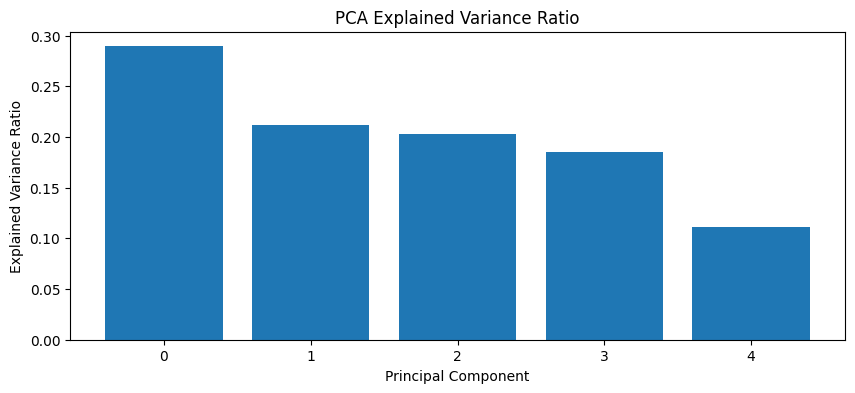

In [21]:
def analyze_features(scaled_features, original_data):
    # Calculate correlation matrix
    corr_matrix = original_data.corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Perform PCA to analyze feature importance
    pca = PCA()
    pca_result = pca.fit_transform(scaled_features)
    
    # Calculate explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    
    # Plot explained variance ratio
    plt.figure(figsize=(10, 4))
    plt.bar(range(len(explained_variance)), explained_variance)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA Explained Variance Ratio')
    plt.show()
    
    return pca, explained_variance

# Analyze features
pca, explained_variance = analyze_features(scaled_features, data_cleaned)



## Task 3: Customer Segmentation
Implement the clustering with optimal k selection:



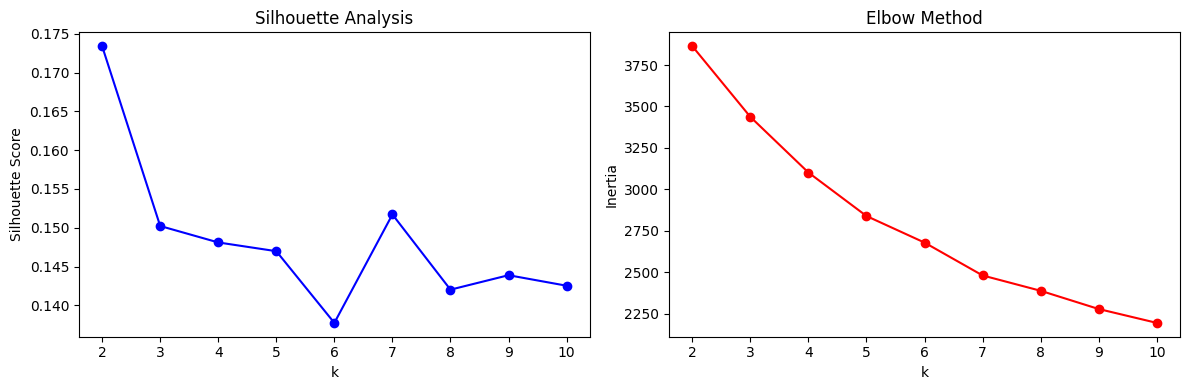

In [22]:
def perform_clustering(scaled_features, k_range=range(2, 11)):
    from sklearn.metrics import silhouette_score
    
    silhouette_scores = []
    inertias = []
    
    for k in k_range:
        # Create and fit KMeans model
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(scaled_features)
        
        # Calculate silhouette score and inertia
        silhouette_scores.append(silhouette_score(scaled_features, labels))
        inertias.append(kmeans.inertia_)
    
    # Plot evaluation metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(k_range, silhouette_scores, 'bo-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Silhouette Score')
    ax1.set_title('Silhouette Analysis')
    
    ax2.plot(k_range, inertias, 'ro-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Inertia')
    ax2.set_title('Elbow Method')
    
    plt.tight_layout()
    plt.show()
    
    # Determine optimal k
    # Hint: Use both silhouette score and elbow method
    optimal_k = k_range[np.argmax(silhouette_scores)]
    
    return optimal_k

# Find optimal number of clusters
optimal_k = perform_clustering(scaled_features)



## Task 4: Analyze and Visualize Segments
Complete the function to analyze and visualize the customer segments:




Segment Characteristics:
               age        income  spending_score  purchase_frequency  \
Cluster                                                                
0        45.256463  76203.999202       72.277792           18.981823   
1        45.378586  68383.557017       39.434160           11.599028   

         last_purchase  
Cluster                 
0            30.908905  
1            27.151391  


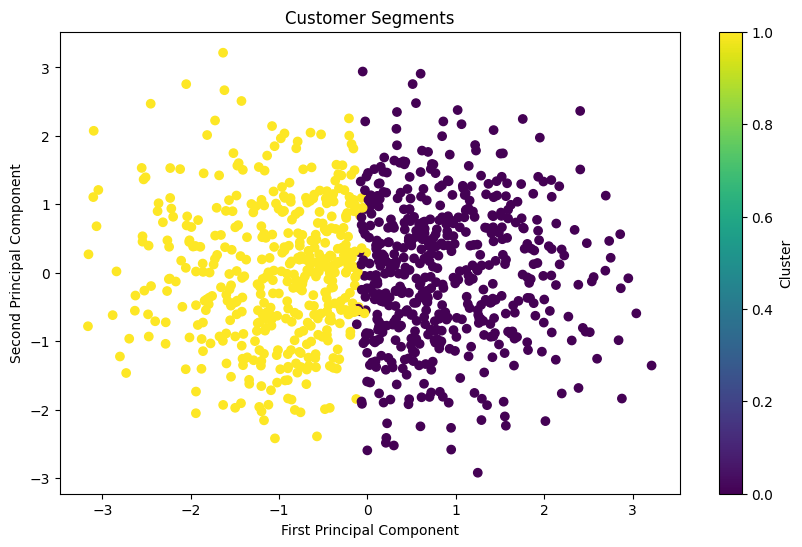

In [23]:
def analyze_segments(scaled_features, data_cleaned, optimal_k, pca):
    # Perform final clustering
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    
    # Add cluster labels to the original data
    data_with_clusters = data_cleaned.copy()
    data_with_clusters['Cluster'] = labels
    
    # Calculate segment characteristics
    segment_analysis = data_with_clusters.groupby('Cluster').mean()  # Group by cluster and calculate means
    
    print("\nSegment Characteristics:")
    print(segment_analysis)
    
    # Create scatter plot using first two PCA components
    pca_result = pca.transform(scaled_features)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                         c=labels, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Customer Segments')
    plt.colorbar(scatter, label='Cluster')
    plt.show()
    
    return data_with_clusters, segment_analysis

# Analyze and visualize segments
data_with_clusters, segment_analysis = analyze_segments(scaled_features, 
                                                      data_cleaned, 
                                                      optimal_k, 
                                                      pca)



## Task 5: Create Customer Segment Profiles
Create meaningful descriptions for each customer segment:



In [24]:
def create_segment_profiles(segment_analysis):
    profiles = {}
    
    for cluster in segment_analysis.index:
        # Analyze the characteristics of each cluster
        characteristics = segment_analysis.loc[cluster]
        
        # Create a descriptive profile based on the characteristics
        # Hint: Compare values to overall means
        profile = {
    feature: f"High" if value > segment_analysis.mean()[feature] else "Low"
    for feature, value in characteristics.items()
}





  # Create meaningful description
        
        profiles[f"Segment {cluster}"] = profile
    
    return profiles

# Create and print segment profiles
profiles = create_segment_profiles(segment_analysis)
for segment, description in profiles.items():
    print(f"\n{segment}:")
    print(description)


Segment 0:
{'age': 'Low', 'income': 'High', 'spending_score': 'High', 'purchase_frequency': 'High', 'last_purchase': 'High'}

Segment 1:
{'age': 'High', 'income': 'Low', 'spending_score': 'Low', 'purchase_frequency': 'Low', 'last_purchase': 'Low'}




## Discussion Questions
1. How did you determine which features were most important for clustering?
2. What insights can you draw about the customer segments you identified?
3. How might these segments be used to inform marketing strategies?
4. What limitations might this segmentation analysis have?


# Exercise 5: Visualizing High-Dimensional Clusters

In this exercise, you'll work with high-dimensional data and learn to visualize clustering results using different dimensionality reduction techniques. You'll compare PCA, t-SNE, and UMAP for cluster visualization.

## Setup
First, let's create some high-dimensional data with known cluster structure:



In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns

# Create high-dimensional data (20 dimensions) with 5 clusters
n_samples = 500
n_features = 20
n_clusters = 5

# Generate data with known cluster structure
X, true_labels = make_blobs(n_samples=n_samples, 
                           n_features=n_features,
                           centers=n_clusters,
                           cluster_std=1.8,
                           random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

print("Data shape:", X.shape)

ModuleNotFoundError: No module named 'umap'



## Task 1: Implement PCA Visualization
Complete the function to visualize clusters using PCA:



In [ ]:
def visualize_pca(X_scaled, labels, title):
    # Create and fit PCA
    # Hint: Use n_components=2 for 2D visualization
    pca = # YOUR CODE HERE
    X_pca = # YOUR CODE HERE
    
    # Calculate explained variance ratio
    explained_variance = # YOUR CODE HERE
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    
    # Add variance explanation text
    variance_text = f'Explained variance: {sum(explained_variance):.2%}'
    plt.text(0.02, 0.98, variance_text, transform=plt.gca().transAxes)
    
    plt.title(f'PCA Visualization: {title}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    
    return X_pca

# Visualize both true labels and cluster assignments
X_pca_true = visualize_pca(X_scaled, true_labels, "True Labels")
X_pca_cluster = visualize_pca(X_scaled, cluster_labels, "Cluster Assignments")



## Task 2: Implement t-SNE Visualization
Complete the function to visualize clusters using t-SNE:



In [ ]:
def visualize_tsne(X_scaled, labels, title, perplexity=30):
    # Create and fit t-SNE
    # Hint: Use n_components=2 and the given perplexity
    tsne = # YOUR CODE HERE
    X_tsne = # YOUR CODE HERE
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    
    # Add perplexity information
    plt.text(0.02, 0.98, f'Perplexity: {perplexity}', transform=plt.gca().transAxes)
    
    plt.title(f't-SNE Visualization: {title}')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()
    
    return X_tsne

# Try different perplexity values
perplexities = [5, 30, 50]
for perp in perplexities:
    X_tsne = visualize_tsne(X_scaled, cluster_labels, f"Perplexity {perp}", perp)



## Task 3: Implement UMAP Visualization
Complete the function to visualize clusters using UMAP:



In [ ]:
def visualize_umap(X_scaled, labels, title, n_neighbors=15, min_dist=0.1):
    # Create and fit UMAP
    # Hint: Use n_components=2 and the given n_neighbors and min_dist
    reducer = # YOUR CODE HERE
    X_umap = # YOUR CODE HERE
    
    # Create scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    
    # Add parameter information
    plt.text(0.02, 0.98, f'n_neighbors: {n_neighbors}, min_dist: {min_dist}', 
             transform=plt.gca().transAxes)
    
    plt.title(f'UMAP Visualization: {title}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()
    
    return X_umap

# Try different parameter combinations
params = [(5, 0.1), (15, 0.1), (30, 0.5)]
for n_neighbors, min_dist in params:
    X_umap = visualize_umap(X_scaled, cluster_labels, 
                           f"n={n_neighbors}, d={min_dist}",
                           n_neighbors, min_dist)



## Task 4: Compare Methods Quantitatively
Implement a function to evaluate how well each visualization preserves cluster structure:



In [ ]:
def evaluate_visualization(X_original, X_reduced, labels):
    from sklearn.metrics import silhouette_score
    from scipy.stats import spearmanr
    
    # Calculate silhouette score for both original and reduced data
    silhouette_original = # YOUR CODE HERE
    silhouette_reduced = # YOUR CODE HERE
    
    # Calculate pairwise distances in both spaces
    from sklearn.metrics.pairwise import euclidean_distances
    dist_original = euclidean_distances(X_original)
    dist_reduced = euclidean_distances(X_reduced)
    
    # Flatten the distance matrices and calculate correlation
    # Hint: Use spearmanr on the flattened upper triangles
    correlation = # YOUR CODE HERE
    
    return silhouette_original, silhouette_reduced, correlation

# Compare all three methods
results = {
    'PCA': evaluate_visualization(X_scaled, X_pca_cluster, cluster_labels),
    't-SNE': evaluate_visualization(X_scaled, X_tsne, cluster_labels),
    'UMAP': evaluate_visualization(X_scaled, X_umap, cluster_labels)
}

# Print results
for method, (sil_orig, sil_red, corr) in results.items():
    print(f"\n{method} Results:")
    print(f"Original Silhouette Score: {sil_orig:.3f}")
    print(f"Reduced Silhouette Score: {sil_red:.3f}")
    print(f"Distance Correlation: {corr:.3f}")



## Task 5: Create a Dashboard View
Implement a function to show all visualizations side by side:



In [ ]:
def create_visualization_dashboard(X_scaled, labels):
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Generate all three visualizations
    # Hint: Modify previous functions to accept an axis parameter
    pca = PCA(n_components=2)
    X_pca = # YOUR CODE HERE
    
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = # YOUR CODE HERE
    
    reducer = umap.UMAP(random_state=42)
    X_umap = # YOUR CODE HERE
    
    # Create scatter plots
    for ax, (data, title) in zip(axes, [(X_pca, 'PCA'), 
                                       (X_tsne, 't-SNE'),
                                       (X_umap, 'UMAP')]):
        scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
        ax.set_title(title)
        ax.set_xlabel(f'{title} 1')
        ax.set_ylabel(f'{title} 2')
    
    plt.colorbar(scatter, ax=axes)
    plt.tight_layout()
    plt.show()

# Create dashboard for both true labels and cluster assignments
create_visualization_dashboard(X_scaled, true_labels)
create_visualization_dashboard(X_scaled, cluster_labels)



## Discussion Questions
1. How do the three visualization methods differ in their representation of the clusters?
2. Which method best preserves the original cluster structure? Why?
3. How do the parameter choices (perplexity, n_neighbors) affect the visualizations?
4. What are the trade-offs between these different visualization techniques?
